# Singular Value Decomposition of A

$$
A = U \Sigma V^H =\begin{bmatrix}
| & | & & | \\
u_1 & u_2 & \cdots & u_m \\
| & | & & |
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & \cdots & 0 & \cdots 0\\
0 & \sigma_2 & \cdots & 0 & \cdots 0\\
0 & 0 & \ddots & 0  & \cdots 0\\
0 & 0 & \cdots & \sigma_p & \cdots 0\\
\end{bmatrix}
\begin{bmatrix}
 v_1^H \\
v_2^H \\
\hspace{40pt} \vdots \hspace{40pt} \\
 v_n^H \\
\end{bmatrix}
\in \mathbf{C}^{m\times n}
$$

- $p=\min(m,n)$
- $\Sigma=\text{diag}(\sigma_1,\cdots, \sigma_p) \in \mathbf{R}^{m \times n}, \sigma_i \geq 0$
- $U\in \mathbf{C}^{m\times m}$ , $V \in \mathbf{C}^{n \times n}$ are unitary(or orthogonal).

## reference
* matrix computations 4th edition
* wikipedia: https://en.wikipedia.org/wiki/Singular_value_decomposition

## SVD of real m by n matrix

In [1]:
import numpy as np

def compute_SVD(A):        
    # Compute the SVD
    U, S, Vh = np.linalg.svd(A)
    
    # Display the results
    print("Matrix A:")
    print(A)
    print("\nUnitary matrix U:")
    print(U)
    print("\nSingular values (diagonal entries of Sigma):")
    print(S)
    print("\nUnitary matrix V^H:")
    print(Vh)
    
    # Reconstruct A to verify the decomposition
    Sigma = np.zeros_like(A, dtype=np.complex128)
    np.fill_diagonal(Sigma, S)
    A_reconstructed = U @ Sigma @ Vh
    
    print("\nReconstructed A = U@Sigma@V^H (SVD):")
    print(np.round(A_reconstructed, decimals=8))
    print("\nIs A_reconstructed close to A? ", np.allclose(A, A_reconstructed))
    

# Define the complex matrix A
m, n = 3, 2
A = np.random.randint(1, 9, size=(m,n))
compute_SVD(A)


Matrix A:
[[7 5]
 [5 4]
 [2 2]]

Unitary matrix U:
[[-0.77606945  0.50969125  0.37139068]
 [-0.57771479 -0.33841023 -0.74278135]
 [-0.25290675 -0.79100781  0.55708601]]

Singular values (diagonal entries of Sigma):
[11.0798815  0.4860309]

Unitary matrix V^H:
[[-0.79665776 -0.60443065]
 [ 0.60443065 -0.79665776]]

Reconstructed A = U@Sigma@V^H (SVD):
[[7.+0.j 5.+0.j]
 [5.+0.j 4.+0.j]
 [2.+0.j 2.+0.j]]

Is A_reconstructed close to A?  True


## SVD of a complex matrix

In [2]:
import numpy as np

# Define the complex matrix A
A = np.array([
    [1 + 1j, 2], 
    [2 - 1j, 3j]
])

compute_SVD(A)


Matrix A:
[[1.+1.j 2.+0.j]
 [2.-1.j 0.+3.j]]

Unitary matrix U:
[[-0.00550782+0.32823375j  0.50195313+0.80017206j]
 [-0.90099316+0.2836258j   0.20865578-0.25343736j]]

Singular values (diagonal entries of Sigma):
[3.88574568 2.21381582]

Unitary matrix V^H:
[[-0.45368028+0.j          0.21613914-0.86455658j]
 [ 0.89116452+0.j          0.11003363-0.44013452j]]

Reconstructed A = U@Sigma@V^H (SVD):
[[1.+1.j 2.+0.j]
 [2.-1.j 0.+3.j]]

Is A_reconstructed close to A?  True


## Compute SVD of 2 by 2 matrix without numpy's svd

$$
A = \begin{bmatrix} w & x \\ y & z \end{bmatrix} \in \mathbf{R}^{2\times2}
$$

- singular values of A: $\sigma(A)= \sqrt{\lambda(A^T A)}$
    

In [3]:
import numpy as np

# Comute singular values of A
def compute_singular_values(w, x, y, z, result=True):
    # compute eigenvalues of A.T @ A
    A = np.array([
        [w , x], 
        [y, z]
    ])

    G = A.conj().T @ A
    eigen_values, _ = np.linalg.eig(G)
    eigen_values_sorted = np.sort(eigen_values)[::-1]
    singular_values = np.sqrt(eigen_values_sorted)

    if result:
        print("\nA:")
        print(A)
        print("\nA^T A:")
        print(G)
        print("\nEigenvalues of A^T A:")
        print(eigen_values_sorted)
        print("\nSingular values of A")
        print(singular_values)
    
    return singular_values

# Define a complex matrix
w = 1
x = 4
y = 3
z = 3
A = np.array([
        [w , x], 
        [y, z]
    ])

# Compute the SVD
U, S, Vh = np.linalg.svd(A)

# Compute singular values using my formula
print("\n**********************************")
print("Compute Singular values of A using my formula:")
my_S = compute_singular_values(w,x,y,z)

# Print the singular values
print("\n**********************************")
print("Verify the result")
print("\nSingular values(numpy):")
print(S)
print("\nsingular values (my formula):")
print(my_S)



**********************************
Compute Singular values of A using my formula:

A:
[[1 4]
 [3 3]]

A^T A:
[[10 13]
 [13 25]]

Eigenvalues of A^T A:
[32.50833102  2.49166898]

Singular values of A
[5.70160776 1.57850213]

**********************************
Verify the result

Singular values(numpy):
[5.70160776 1.57850213]

singular values (my formula):
[5.70160776 1.57850213]


## Compute the best rank-1 approximation to A 

$$
A = \begin{bmatrix}
1 & M \\
0 & 1
\end{bmatrix}
$$

### SVD of A
$$
A = U\Sigma V^H = \sum_{i=1}^p \sigma_i u_i v_i^\top
$$


###  rank-k approximation
The Eckart–Young–Mirsky theorem tells that the best rank-k approximation to A is:

$$
A_k = \sum_{i=1}^k \sigma_i u_i v_i^\top
$$

* https://en.wikipedia.org/wiki/Low-rank_approximation

In [4]:
import numpy as np

M = 1
A = np.array([
    [1, M],
    [0, 1]
])

U, S, Vh = np.linalg.svd(A)
best_A1 = S[0]*U[:,0].reshape(-1,1)@ Vh[0,:].reshape(1,-1)
smallest_norm = np.sqrt((abs(A-best_A1)**2).sum())

print("\nA:")
print(A)
print("\nSVD of A:")
print(U@np.diag(S)@Vh)
print("\nU")
print(U)
print("\nSingular values:")
print(S)
print("\nVh")
print(Vh)
print("\nbest A1:")
print(best_A1)
print("\n||A-A1||F:")
print(smallest_norm )



A:
[[1 1]
 [0 1]]

SVD of A:
[[1.00000000e+00 1.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]

U
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]

Singular values:
[1.61803399 0.61803399]

Vh
[[ 0.52573111  0.85065081]
 [-0.85065081  0.52573111]]

best A1:
[[0.7236068  1.17082039]
 [0.4472136  0.7236068 ]]

||A-A1||F:
0.6180339887498949


## Compute A1 using Gradient Descent

In [5]:
import numpy as np

# Initialize matrix A
#M = 1
A = np.array([
    [1, M],
    [0, 1]
])

# Dimensions of A
m, n = A.shape

# Initialize u and v randomly
u = np.random.randn(m, 1)
v = np.random.randn(n, 1)

# Learning rate
eta = 0.1
num_iterations = 10000
tolerance = 1e-16

# Gradient descent loop
B_old = A.copy()
for i in range(num_iterations):
    # Compute the prediction B = uv^T
    B = u @ v.T
    
    # Compute the error
    error = A - B
    
    # Compute the gradients
    grad_u = -2 * error @ v  # Gradients for u
    grad_v = -2 * u.T @ error  # Gradients for v
    
    # Update u and v
    u -= eta * grad_u
    v -= eta * grad_v.T  # Ensure v is transposed correctly during the update
    
    # Compute the Frobenius norm of the error
    norm_error = np.linalg.norm(B-B_old, 'fro')
    
    # Check convergence
    if norm_error < tolerance:
        print(f"\nMatrix B Converged at iteration {i+1}")
        print("\nB:")
        print(B)
        break
    B_old = B

# Final rank-1 approximation
A1 = u @ v.T

# Results
print("\nOriginal Matrix A:")
print(A)
print("\nRank-1 Approximation A1 (using gradient descent):")
print(A1)
print("\nFrobenius norm of the error (||A - A1||_F):")
print(np.linalg.norm(A - A1, 'fro'))
print()


# compare the results
print("*********************")
print("Compare the results:")
print("\n||A - best A1||_F (using SVD):")
print(np.linalg.norm(A - A1, 'fro'))
print("\n||A - A1||_F (using GD):")
print(np.linalg.norm(A - best_A1, 'fro'))



Matrix B Converged at iteration 185

B:
[[0.7236068  1.17082039]
 [0.4472136  0.7236068 ]]

Original Matrix A:
[[1 1]
 [0 1]]

Rank-1 Approximation A1 (using gradient descent):
[[0.7236068  1.17082039]
 [0.4472136  0.7236068 ]]

Frobenius norm of the error (||A - A1||_F):
0.6180339887498948

*********************
Compare the results:

||A - best A1||_F (using SVD):
0.6180339887498948

||A - A1||_F (using GD):
0.6180339887498949


## visualize A1 and ||A-A1||

$$
A = \begin{bmatrix}
1 & M \\
0 & 1
\end{bmatrix}
$$

This result shows that the identity matrix is far from rank-1 matrices in frobenius norm.

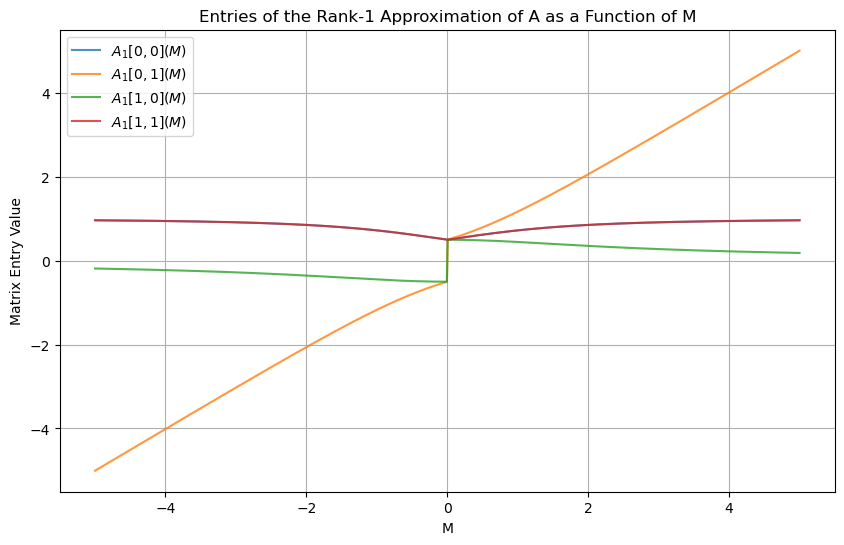

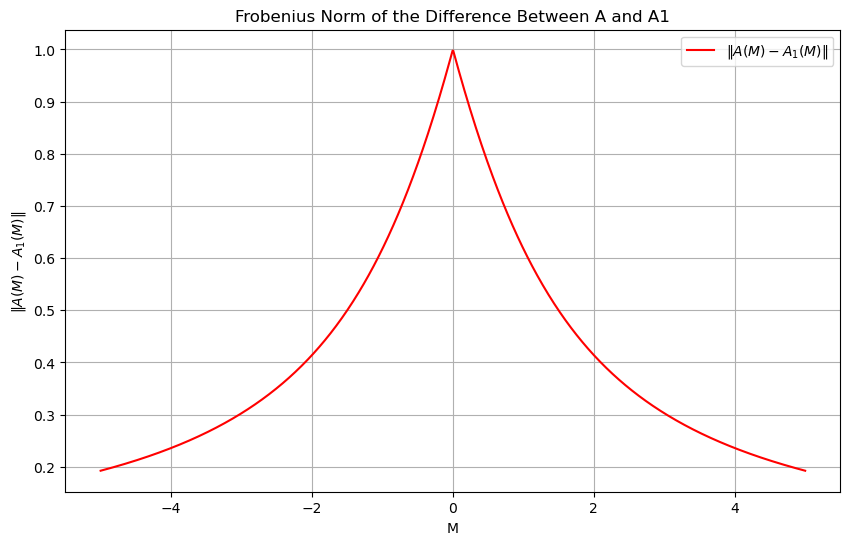

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# List to store rank-1 approximations
matrices = []
norms = []

def compute_rank_k_matrix(M):
    """
    Computes the rank-1 approximation of a given 2x2 matrix 
    with a parameter M and appends it to the global list.
    """
    A = np.array([
        [1, M],
        [0, 1.0]
    ])
    
    # Compute SVD of A
    U, S, Vh = np.linalg.svd(A)
    
    # Compute the rank-1 approximation
    A1 = S[0] * np.outer(U[:, 0], Vh[0, :])
    norm = np.linalg.norm(A - A1, 'fro')
    
    # Append to the list of matrices
    matrices.append(A1)
    norms.append(norm)

# Range of parameter M
t = np.linspace(-5, 5, 1000)

# Compute rank-1 matrices for all values of M
for m in t:
    compute_rank_k_matrix(m)

# Convert list of matrices to a numpy array for easier slicing
matrices = np.array(matrices)
norms = np.array(norms)

# Plot the entries of the rank-1 approximations
plt.figure(figsize=(10, 6))
plt.plot(t, matrices[:, 0, 0], label=r"$A_1[0,0](M)$", alpha=0.8)
plt.plot(t, matrices[:, 0, 1], label=r"$A_1[0,1](M)$", alpha=0.8)
plt.plot(t, matrices[:, 1, 0], label=r"$A_1[1,0](M)$", alpha=0.8)
plt.plot(t, matrices[:, 1, 1], label=r"$A_1[1,1](M)$", alpha=0.8)

# Add labels and legend
plt.title("Entries of the Rank-1 Approximation of A as a Function of M")
plt.xlabel("M")
plt.ylabel("Matrix Entry Value")
plt.legend()
plt.grid()
plt.show()

# Plot the Frobenius norm of the difference
plt.figure(figsize=(10, 6))
plt.plot(t, norms, label=r"$\|A(M)-A_1(M)\|$", color='red')
plt.title("Frobenius Norm of the Difference Between A and A1")
plt.xlabel("M")
plt.ylabel(r"$\|A(M)-A_1(M)\|$")
plt.legend()
plt.grid()
plt.show()
